# Primeiro, olhe nosso conjunto de dados

Neste notebook, veremos as etapas necess√°rias exigidas antes de qualquer
o aprendizado de m√°quina ocorre. Envolve:

* carregando os dados;
* olhando para as vari√°veis no conjunto de dados, em particular, diferenciar
  entre vari√°veis num√©ricas e categ√≥ricas, que precisam de diferentes
  pr√©-processamento na maioria dos fluxos de trabalho de aprendizado de m√°quina;
* visualizar a distribui√ß√£o das vari√°veis para obter alguns insights sobre
  o conjunto de dados.

## Loading the adult census dataset

Usaremos dados do censo dos Estados Unidos de 1994 que baixamos de
[OpenML](http://openml.org/).

O conjunto de dados est√° dispon√≠vel como um arquivo CSV (Comma-Separated Values) e n√≥s iremos
use pandas para l√™-lo.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last"><a class="reference external" href="https://pandas.pydata.org/">Pandas</a> √© uma biblioteca Python usada para
manipula√ß√£o de dados estruturados em 1 e 2 dimens√µes. Se voc√™ nunca usou
pandas, recomendamos que voc√™ olhe para isso
<a class="reference external" href="https://pandas.pydata.org/docs/user_guide/10min.html">tutorial</a>.</p>
</div>

In [1]:
import pandas as pd

adult_census = pd.read_csv("adult-census.csv") 

O objetivo com esses dados √© prever se uma pessoa ganha mais de 50 mil por ano com dados heterog√™neos, como idade, emprego, educa√ß√£o, informa√ß√µes familiares, etc.

## As vari√°veis (colunas) no conjunto de dados

Os dados s√£o armazenados em um dataframe do pandas. Um dataframe √© um tipo de
dados estruturados compostos por 2 dimens√µes. Este tipo de dado tamb√©m √© referido
como dados tabulares.

Cada linha representa uma amostra. No campo do aprendizado de m√°quina ou descritivo
estat√≠sticas, os termos equivalentes comumente usados s√£o "registro", "inst√¢ncia" ou
"observa√ß√£o".

Cada coluna representa um tipo de informa√ß√£o que foi coletada e √©
chamado de recurso. No campo do aprendizado de m√°quina e descritivo
estat√≠sticas, os termos equivalentes comumente usados s√£o "vari√°vel", "atributo" ou
"covari√°vel".

Uma maneira r√°pida de inspecionar o dataframe √© mostrar as primeiras linhas com o
m√©todo `head`:

In [2]:
adult_census.head()

ID  age         workclass  fnlwgt: education:  education-num:  \
0   1   39         State-gov    77516  Bachelors              13   
1   2   50  Self-emp-not-inc    83311  Bachelors              13   
2   3   38           Private   215646    HS-grad               9   
3   4   53           Private   234721       11th               7   
4   5   28           Private   338409  Bachelors              13   

      marital-status:        occupation:  relationship:  race:    sex:  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain:  capital-loss:  hours-per-week: native-country:  class  
0           2174              0               40   United-States  <=50K  
1              0              0               13   United-States  <=50K  
2              0              0               40   United-States  <=50K  
3              0              0               40   United-States  <=50K  
4              0              0               40            Cuba  <=50K

In [3]:
adult_census = adult_census.drop(columns=['ID'])
adult_census.head()

age         workclass  fnlwgt: education:  education-num:  \
0   39         State-gov    77516  Bachelors              13   
1   50  Self-emp-not-inc    83311  Bachelors              13   
2   38           Private   215646    HS-grad               9   
3   53           Private   234721       11th               7   
4   28           Private   338409  Bachelors              13   

      marital-status:        occupation:  relationship:  race:    sex:  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain:  capital-loss:  hours-per-week: native-country:  class  
0           2174              0               40   United-States  <=50K  
1              0              0               13   United-States  <=50K  
2              0              0               40   United-States  <=50K  
3              0              0               40   United-States  <=50K  
4              0              0               40            Cuba  <=50K

A coluna denominada class √© nossa vari√°vel de destino (ou seja, a vari√°vel que desejamos prever). As duas classes poss√≠veis s√£o <= 50K (receita baixa) e> 50K (receita alta). O problema de previs√£o resultante √©, portanto, um problema de classifica√ß√£o bin√°ria, enquanto usaremos as outras colunas como vari√°veis ‚Äã‚Äãde entrada para nosso modelo.

In [4]:
target_column = 'class'
adult_census[target_column].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: int64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>As aulas s√£o ligeiramente desequilibradas, o que significa que h√° mais amostras de uma ou
mais classes em compara√ß√£o com outras. O desequil√≠brio de classes acontece frequentemente na pr√°tica
e pode precisar de t√©cnicas especiais ao construir um modelo preditivo.</p>
<p class="last">Por exemplo, em um ambiente m√©dico, se estamos tentando prever se
indiv√≠duos desenvolver√£o uma doen√ßa rara, haver√° muito mais
assuntos do que assuntos doentes no conjunto de dados.</p>
</div>

O conjunto de dados cont√©m dados num√©ricos e categ√≥ricos. Valores num√©ricos
assumir valores cont√≠nuos, por exemplo `age`. Os valores categ√≥ricos podem ter um
n√∫mero finito de valores, por exemplo `native-country`

In [5]:
print(adult_census.columns.tolist())

['age', 'workclass', 'fnlwgt:', 'education:', 'education-num:', 'marital-status:', 'occupation:', 'relationship:', 'race:', 'sex:', 'capital-gain:', 'capital-loss:', 'hours-per-week:', 'native-country:', 'class']


In [6]:
numerical_columns = [
    'age', 'education-num:', 'capital-gain:', 'capital-loss:',
    'hours-per-week:']
categorical_columns = [
    'workclass', 'education:', 'marital-status:', 'occupation:',
    'relationship:', 'race:', 'sex:', 'native-country:']
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

Podemos verificar o n√∫mero de amostras e o n√∫mero de colunas dispon√≠veis em
o conjunto de dados:

In [7]:
print(f"The dataset contains {adult_census.shape[0]} samples and "
      f"{adult_census.shape[1]} columns")

The dataset contains 32561 samples and 14 columns


Podemos calcular o n√∫mero de recursos contando o n√∫mero de colunas e
subtraia 1, pois uma das colunas √© o destino.

In [8]:
print(f"The dataset contains {adult_census.shape[1] - 1} features.")

The dataset contains 13 features.


## Inspe√ß√£o visual dos dados
Antes de construir um modelo preditivo, √© uma boa ideia olhar os dados:

* talvez a tarefa que voc√™ est√° tentando realizar possa ser resolvida sem aprendendo m√°quina;
* voc√™ precisa verificar se as informa√ß√µes necess√°rias para a sua tarefa s√£o realmente
  presente no conjunto de dados;
* inspecionar os dados √© uma boa maneira de encontrar peculiaridades. Estes podem
  surgem durante a coleta de dados (por exemplo, sensor com defeito ou ausente
  valores), ou da forma como os dados s√£o processados posteriormente (por exemplo
  valores limitados).

Vejamos a distribui√ß√£o de recursos individuais para obter alguns insights
sobre os dados. Podemos come√ßar plotando histogramas, observe que isso apenas
funciona para recursos que cont√™m valores num√©ricos:

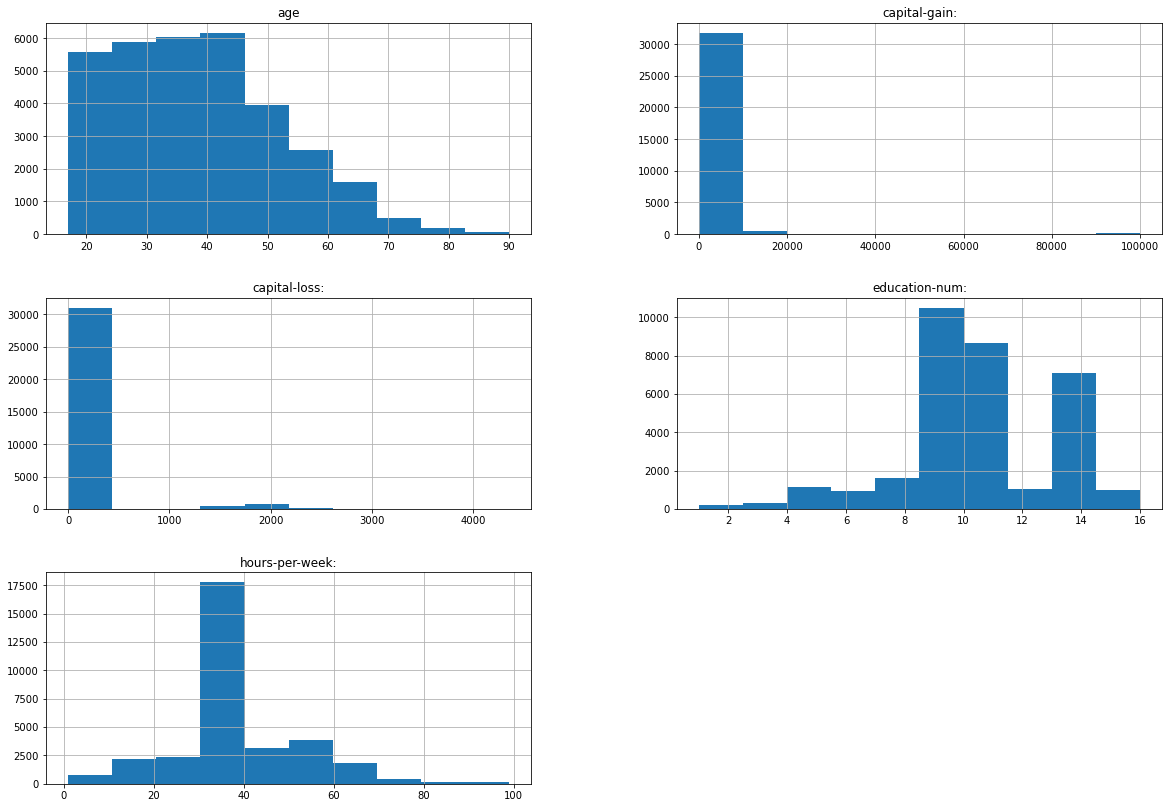

In [9]:
_ = adult_census.hist(figsize=(20, 14))

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">Na c√©lula anterior, usamos o seguinte padr√£o: <tt class="docutils literal">_ = func()</tt>. N√≥s fazemos isso
para evitar mostrar a sa√≠da de <tt class="docutils literal">func()</tt> que neste caso isso n√£o √© 
√∫til. Na verdade, atribu√≠mos a sa√≠da de <tt class="docutils literal">func()</tt> na vari√°vel <tt class="docutils literal">_</tt>
(called underscore). Por conven√ß√£o, em Python, a vari√°vel de sublinhado √© usada
como uma vari√°vel "garbage" (lixo) para armazenar resultados nos quais n√£o estamos interessados.</p>
</div>

J√° podemos fazer alguns coment√°rios sobre algumas das vari√°veis:

* `age`: n√£o h√° muitos pontos para` age > 70`. O conjunto de dados
  a descri√ß√£o indica que aposentados foram filtrados
  (`hours-per-week > 0`);
* `education-num`: pico em 10 e 13, dif√≠cil dizer a que corresponde
  sem olhar muito mais longe. Faremos isso mais tarde neste caderno;
* O pico de `hours-per-week` chega a 40, este era muito provavelmente o n√∫mero padr√£o de
  hor√°rio de trabalho no momento da coleta de dados;
* a maioria dos valores de `capital-gain` e` capital-loss` s√£o pr√≥ximos de zero.


Para vari√°veis categ√≥ricas, podemos olhar para a distribui√ß√£o de valore

In [27]:
adult_census['sex:'].value_counts()

Male      21790
Female    10771
Name: sex:, dtype: int64

In [29]:
adult_census['education:'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education:, dtype: int64

Conforme observado acima, a distribui√ß√£o `education-num` tem dois picos claros em torno de 10
e 13. Seria razo√°vel esperar que `education-num` seja o n√∫mero
de anos de educa√ß√£o.

Vejamos a rela√ß√£o entre `education` e `education-num`.

In [31]:
pd.crosstab(index=adult_census['education:'],
            columns=adult_census['education-num:'])

education-num:  1    2    3    4    5    6     7    8      9     10    11  \
education:                                                                  
10th             0    0    0    0    0  933     0    0      0     0     0   
11th             0    0    0    0    0    0  1175    0      0     0     0   
12th             0    0    0    0    0    0     0  433      0     0     0   
1st-4th          0  168    0    0    0    0     0    0      0     0     0   
5th-6th          0    0  333    0    0    0     0    0      0     0     0   
7th-8th          0    0    0  646    0    0     0    0      0     0     0   
9th              0    0    0    0  514    0     0    0      0     0     0   
Assoc-acdm       0    0    0    0    0    0     0    0      0     0     0   
Assoc-voc        0    0    0    0    0    0     0    0      0     0  1382   
Bachelors        0    0    0    0    0    0     0    0      0     0     0   
Doctorate        0    0    0    0    0    0     0    0      0     0     0   
HS-grad          0    0    0    0    0    0     0    0  10501     0     0   
Masters          0    0    0    0    0    0     0    0      0     0     0   
Preschool       51    0    0    0    0    0     0    0      0     0     0   
Prof-school      0    0    0    0    0    0     0    0      0     0     0   
Some-college     0    0    0    0    0    0     0    0      0  7291     0   

education-num:    12    13    14   15   16  
education:                                  
10th               0     0     0    0    0  
11th               0     0     0    0    0  
12th               0     0     0    0    0  
1st-4th            0     0     0    0    0  
5th-6th            0     0     0    0    0  
7th-8th            0     0     0    0    0  
9th                0     0     0    0    0  
Assoc-acdm      1067     0     0    0    0  
Assoc-voc          0     0     0    0    0  
Bachelors          0  5355     0    0    0  
Doctorate          0     0     0    0  413  
HS-grad            0     0     0    0    0  
Masters            0     0  1723    0    0  
Preschool          0     0     0    0    0  
Prof-school        0     0     0  576    0  
Some-college       0     0     0    0    0

Isso mostra que `education` e `education-num` d√£o a voc√™ o mesmo
em forma√ß√£o. Por exemplo, `education-num = 2` √© equivalente a
`education = '1¬™-4¬™'`. Na pr√°tica, isso significa que podemos remover `education-num`
sem perder informa√ß√µes. Observe que ter redundantes (ou altamente correlacionadas)
colunas podem ser um problema para algoritmos de aprendizado de m√°quina.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Nos pr√≥ximos cadernos, vamos manter apenas o <tt class="docutils literal">education</tt> vari√°vel,
excluindo o <tt class="docutils literal"><span class="pre">education-num</span></tt> 
vari√°vel, uma vez que o √∫ltimo √© redundante com o
antigo.</p>
</div>

Outra maneira de inspecionar os dados √© fazer um `pairplot` e mostrar como cada
vari√°vel difere de acordo com nosso alvo, ou seja, `classe`. Parcela ao longo do
diagonal mostra a distribui√ß√£o de vari√°veis individuais para cada `classe`. O
plotagens fora da diagonal podem revelar intera√ß√µes interessantes entre
vari√°veis.

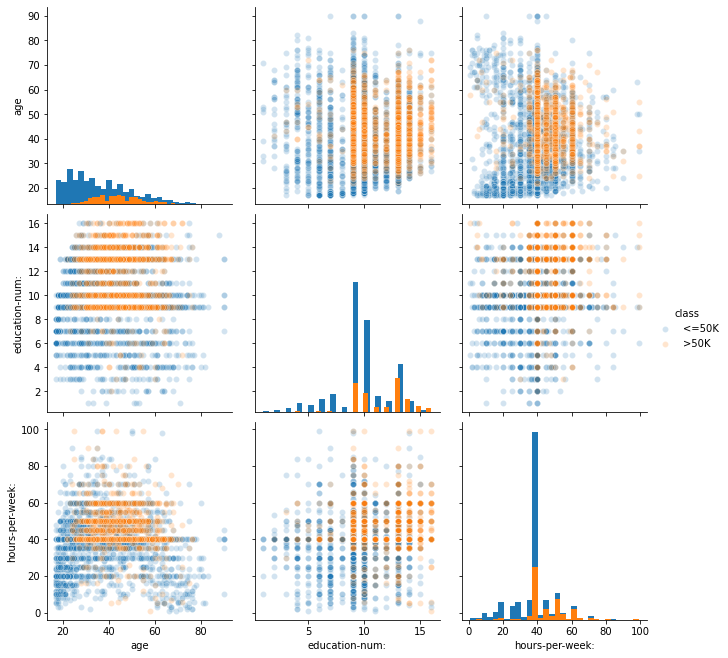

In [34]:
import seaborn as sns

# Vamos representar graficamente um subconjunto de dados para manter o gr√°fico leg√≠vel e tornar o
# plotting mais r√°pido
n_samples_to_plot = 5000
columns = ['age', 'education-num:', 'hours-per-week:']
_ = sns.pairplot(data=adult_census[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

## Criando regras de decis√£o manualmente

Olhando para os gr√°ficos anteriores, poder√≠amos criar algumas regras escritas √† m√£o
que prev√™ se algu√©m tem uma renda alta ou baixa. Por exemplo, n√≥s
poderia se concentrar na combina√ß√£o dos recursos `hours-per-week` e `age`.

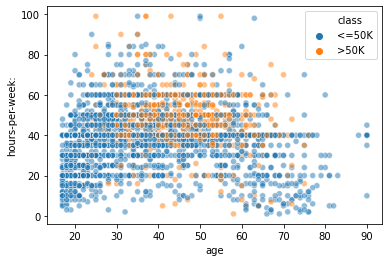

In [37]:
_ = sns.scatterplot(
    x="age", y="hours-per-week:", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,)

Os pontos de dados (c√≠rculos) mostram a distribui√ß√£o de `hours-per-week` e `age`
no conjunto de dados. Os pontos azuis significam baixa renda e os pontos laranja significam
alta renda. Esta parte do gr√°fico √© igual ao gr√°fico inferior esquerdo em
o par acima.

Neste gr√°fico, podemos tentar encontrar regi√µes que cont√™m principalmente uma √∫nica classe
de forma que podemos facilmente decidir que classe devemos prever. Poder√≠amos vir
com regras escritas √† m√£o, conforme mostrado neste gr√°fico:

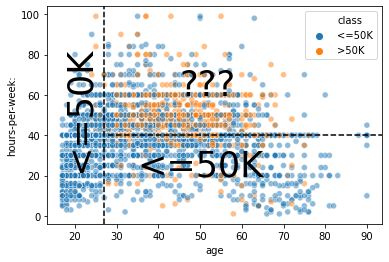

In [38]:
import matplotlib.pyplot as plt

ax = sns.scatterplot(
    x="age", y="hours-per-week:", data=adult_census[:n_samples_to_plot],
    hue="class", alpha=0.5,
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color="black", linestyle="--")

hours_per_week_limit = 40
plt.axhline(
    y=hours_per_week_limit, xmin=0.18, xmax=1, color="black", linestyle="--"
)

plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)

* Na regi√£o `age <27` (regi√£o esquerda) a previs√£o √© de baixa renda.
  Na verdade, existem muitos pontos azuis e n√£o podemos ver nenhum ponto laranja.
* Na regi√£o `age > 27 AND hours-per-week < 40`
  (regi√£o inferior direita), a previs√£o √© de baixa renda. Na verdade, existem
  muitos pontos azuis e apenas alguns pontos laranja.
* Na regi√£o `age > 27 AND hours-per-week > 40` (regi√£o superior direita),
  vemos uma mistura de pontos azuis e laranja. Parece complicado para
  escolheu qual classe devemos prever nesta regi√£o.

√â interessante notar que alguns modelos de aprendizado de m√°quina funcionar√£o
de forma semelhante ao que fizemos: eles s√£o conhecidos como modelos de √°rvore de decis√£o. Os dois
os limites que escolhemos (27 anos e 40 horas) s√£o um tanto arbitr√°rios, ou seja,
n√≥s os escolhemos olhando apenas para o pareamento. Em contraste, uma √°rvore de decis√£o ir√° escolher as "melhores" divis√µes com base nos dados sem interven√ß√£o humana ou inspe√ß√£o. As √°rvores de decis√£o ser√£o abordadas com mais detalhes em um m√≥dulo futuro.

Observe que o aprendizado de m√°quina √© realmente interessante ao criar regras manualmente
n√£o √© simples, por exemplo, porque estamos em alta dimens√£o (muitos
recursos) ou porque n√£o existem regras simples e √≥bvias que separam o
duas classes como na regi√£o superior direita do gr√°fico anterior.

Para resumir, o importante a lembrar √© que em um aprendizado de m√°quina
configura√ß√£o, um modelo cria automaticamente as "regras" dos dados para
fazer previs√µes sobre novos dados n√£o vistos.

Neste caderno temos:

* carregou os dados de um arquivo CSV usando `pandas`;
* olhou para os diferentes tipos de vari√°veis para diferenciar entre
  vari√°veis categ√≥ricas e num√©ricas;
* inspecionou os dados com `pandas` e ` seaborn`. A inspe√ß√£o de dados pode permitir
  voc√™ decide se usar o aprendizado de m√°quina √© apropriado para seus dados
  e para destacar potenciais peculiaridades em seus dados.

Ideias que ser√£o discutidas com mais detalhes posteriormente:

* se sua vari√°vel de destino estiver desequilibrada (por exemplo, voc√™ tem mais amostras de um
  categoria-alvo do que outra), voc√™ pode precisar de t√©cnicas especiais para treinamento
  e avaliar seu modelo de aprendizado de m√°quina;
* ter colunas redundantes (ou altamente correlacionadas) pode ser um problema para
  alguns algoritmos de aprendizado de m√°quina;
* ao contr√°rio da √°rvore de decis√£o, os modelos lineares s√≥ podem capturar lineares
  intera√ß√£o, portanto, esteja ciente das rela√ß√µes n√£o lineares em seus dados.

# üìù Exercise M1.01

Imagine que estejamos interessados em prever esp√©cies de pinguins com base em dois dos
suas medidas corporais: comprimento e profundidade do c√∫lmen. Primeiro queremos fazer
alguma explora√ß√£o de dados para ter uma ideia dos dados.

Quais s√£o os recursos? Qual √© o alvo?

Os dados est√£o localizados em `../ datasets / penguins_classification.csv`, carregue-os
com `pandas` em um` DataFrame`.

In [8]:
import pandas as pd

penguins = pd.read_csv("penguins_classification.csv")

Mostre algumas amostras dos dados

Quantos recursos s√£o num√©ricos? Quantos recursos s√£o categ√≥ricos?

In [9]:
penguins.head()

Culmen Length (mm)  Culmen Depth (mm) Species
0                39.1               18.7  Adelie
1                39.5               17.4  Adelie
2                40.3               18.0  Adelie
3                36.7               19.3  Adelie
4                39.3               20.6  Adelie

In [67]:
penguins = penguins.drop(columns=['island', 'flipper_length_mm', 'body_mass_g', 'sex'])
penguins.head()

species culmen_length_mm culmen_depth_mm
0  Adelie             39.1            18.7
1  Adelie             39.5            17.4
2  Adelie             40.3            18.0
3  Adelie                ?               ?
4  Adelie             36.7            19.3

Quais s√£o as diferentes esp√©cies de pinguins dispon√≠veis no conjunto de dados e quantas
amostras de cada esp√©cie existem? Dica: selecione a coluna certa e use
o m√©todo [`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [11]:
penguins['Species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

Plot histogramas para os recursos num√©ricos

In [12]:
penguins.isnull().sum()

Culmen Length (mm)    0
Culmen Depth (mm)     0
Species               0
dtype: int64

In [13]:
penguins.dropna(inplace=True)
penguins.head()

Culmen Length (mm)  Culmen Depth (mm) Species
0                39.1               18.7  Adelie
1                39.5               17.4  Adelie
2                40.3               18.0  Adelie
3                36.7               19.3  Adelie
4                39.3               20.6  Adelie

In [14]:
_ = penguins.hist(figsize=(20, 14))

Mostra a distribui√ß√£o de recursos para cada classe. Dica: use
[`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [15]:
target_column = 'Species'
penguins[target_column].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: Species, dtype: int64

In [17]:
import seaborn as sns

# Vamos representar graficamente um subconjunto de dados para manter o gr√°fico leg√≠vel e tornar o
# plotting mais r√°pido
n_samples_to_plot = 5000
columns = ['Culmen Length (mm)', 'Culmen Depth (mm)']
_ = sns.pairplot(data=penguins[:n_samples_to_plot], vars=columns,
                 hue=target_column, plot_kws={'alpha': 0.2},
                 height=3, diag_kind='hist', diag_kws={'bins': 30})

Olhando para essas distribui√ß√µes, qu√£o dif√≠cil voc√™ acha que ser√° para classificar
os pinguins usando apenas "profundidade do c√∫lmen" e "comprimento do c√∫lmen"?